<a href="https://colab.research.google.com/github/Zoya-Haris/Machine-Learning/blob/main/RainfallPrediction_LogisticRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**IMPORT LIBRARIES**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df = pd.read_csv('weatherAUS.csv')

In [ ]:
df.shape

(142193, 24)

In [ ]:
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,0.0,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,0.0,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,0.0,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,1.0,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,0.2,No


In [ ]:
#WE HAVE 17 NUMERICAL AND 7 CATEGORICAL FEATURES
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 142193 entries, 0 to 142192
Data columns (total 24 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           142193 non-null  object 
 1   Location       142193 non-null  object 
 2   MinTemp        141556 non-null  float64
 3   MaxTemp        141871 non-null  float64
 4   Rainfall       140787 non-null  float64
 5   Evaporation    81350 non-null   float64
 6   Sunshine       74377 non-null   float64
 7   WindGustDir    132863 non-null  object 
 8   WindGustSpeed  132923 non-null  float64
 9   WindDir9am     132180 non-null  object 
 10  WindDir3pm     138415 non-null  object 
 11  WindSpeed9am   140845 non-null  float64
 12  WindSpeed3pm   139563 non-null  float64
 13  Humidity9am    140419 non-null  float64
 14  Humidity3pm    138583 non-null  float64
 15  Pressure9am    128179 non-null  float64
 16  Pressure3pm    128212 non-null  float64
 17  Cloud9am       88536 non-null

In [ ]:
df.drop('RISK_MM', axis = 1 , inplace= True)

In [ ]:
# AFTER DROPPING WE HAVE 16 NUMERICAL AND 7 CATEGORICAL FEATURES
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 142193 entries, 0 to 142192
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           142193 non-null  object 
 1   Location       142193 non-null  object 
 2   MinTemp        141556 non-null  float64
 3   MaxTemp        141871 non-null  float64
 4   Rainfall       140787 non-null  float64
 5   Evaporation    81350 non-null   float64
 6   Sunshine       74377 non-null   float64
 7   WindGustDir    132863 non-null  object 
 8   WindGustSpeed  132923 non-null  float64
 9   WindDir9am     132180 non-null  object 
 10  WindDir3pm     138415 non-null  object 
 11  WindSpeed9am   140845 non-null  float64
 12  WindSpeed3pm   139563 non-null  float64
 13  Humidity9am    140419 non-null  float64
 14  Humidity3pm    138583 non-null  float64
 15  Pressure9am    128179 non-null  float64
 16  Pressure3pm    128212 non-null  float64
 17  Cloud9am       88536 non-null

In [ ]:
df.columns

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow'],
      dtype='object')

In [ ]:
#SEPERATING CATEGORICAL FEATURES
categor = [var for var in df.columns if df[var].dtype == 'O' ]
print('There are {} categorical variables'.format(len(categor)))
print('Categorical variables are','\n', categor)

There are 7 categorical variables
Categorical variables are 
 ['Date', 'Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday', 'RainTomorrow']


In [ ]:
#SEPERATING NUMERICAL FEATURES
numer = [var for var in df.columns if df[var].dtype != 'O']
print ('There are {} numerical variables'.format(len(numer)))
print('Numerical variables are ','\n', numer)

There are 16 numerical variables
Numerical variables are  
 ['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm']


In [ ]:
#FEATURE ENGINEER DATE VARIABLE
df['Date'].dtype


dtype('O')

In [ ]:
# PARSE THE DATES CURRENTLY CODED AS STRINGS, INTO DATETIME FORMAT
df['Date'] = pd.to_datetime(df['Date'])

In [ ]:
df['Date'].dtype

dtype('<M8[ns]')

In [ ]:
#EXTRACT YEAR FROM DATE
df['Year'] = df['Date'].dt.year

In [ ]:
df['Year'].head()

0    2008
1    2008
2    2008
3    2008
4    2008
Name: Year, dtype: int64

In [ ]:
#EXTRACT MONTH FROM DATE
df['Month']= df['Date'].dt.month

In [ ]:
df['Month'].head()

0    12
1    12
2    12
3    12
4    12
Name: Month, dtype: int64

In [ ]:
#EXTRACT DAY FROM DATE
df['Day'] = df['Date'].dt.day

In [ ]:
df['Day'].head()

0    1
1    2
2    3
3    4
4    5
Name: Day, dtype: int64

In [ ]:
#3 VARIABLES ARE ADDED
df.columns

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow', 'Year', 'Month', 'Day'],
      dtype='object')

In [ ]:
df.drop('Date', axis = 1 , inplace = True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 142193 entries, 0 to 142192
Data columns (total 25 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Location       142193 non-null  object 
 1   MinTemp        141556 non-null  float64
 2   MaxTemp        141871 non-null  float64
 3   Rainfall       140787 non-null  float64
 4   Evaporation    81350 non-null   float64
 5   Sunshine       74377 non-null   float64
 6   WindGustDir    132863 non-null  object 
 7   WindGustSpeed  132923 non-null  float64
 8   WindDir9am     132180 non-null  object 
 9   WindDir3pm     138415 non-null  object 
 10  WindSpeed9am   140845 non-null  float64
 11  WindSpeed3pm   139563 non-null  float64
 12  Humidity9am    140419 non-null  float64
 13  Humidity3pm    138583 non-null  float64
 14  Pressure9am    128179 non-null  float64
 15  Pressure3pm    128212 non-null  float64
 16  Cloud9am       88536 non-null   float64
 17  Cloud3pm       85099 non-null

**FEATURE ENGINEERING**

In [ ]:
#EXPLORE CATEGORICAL FEATURES
categor = [var for var in df.columns if df[var].dtype == 'O' ]
print('There are {} categorical variables'.format(len(categor)))
print('Categorical variables are','\n', categor)

There are 6 categorical variables
Categorical variables are 
 ['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday', 'RainTomorrow']


In [ ]:
# CHECK NULL VALUES IN CATEGORICAL FEATURES

df[categor].isnull().sum()

Location            0
WindGustDir      9330
WindDir9am      10013
WindDir3pm       3778
RainToday        1406
RainTomorrow        0
dtype: int64

In [ ]:
df[categor].isnull().sum()*100/len(df[categor])

Location        0.000000
WindGustDir     6.561504
WindDir9am      7.041838
WindDir3pm      2.656952
RainToday       0.988797
RainTomorrow    0.000000
dtype: float64

In [ ]:
#IMPUTE MISSING VALUES

categor1 = df[categor]


for col in categor1:

  categor1[col]=categor1[col].fillna(categor1[col].mode()[0])

categor1.isnull().sum()

Location        0
WindGustDir     0
WindDir9am      0
WindDir3pm      0
RainToday       0
RainTomorrow    0
dtype: int64

In [ ]:
#EXPLORE NUMERICAL FEATURES
numer = [var for var in df.columns if df[var].dtype != 'O']
print ('There are {} numerical variables'.format(len(numer)))
print('Numerical variables are ','\n', numer)

There are 19 numerical variables
Numerical variables are  
 ['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm', 'Year', 'Month', 'Day']


In [ ]:
#CHECK NULL VALUES IN NUMERICAL FEATURES
df[numer].isnull().sum()

MinTemp            637
MaxTemp            322
Rainfall          1406
Evaporation      60843
Sunshine         67816
WindGustSpeed     9270
WindSpeed9am      1348
WindSpeed3pm      2630
Humidity9am       1774
Humidity3pm       3610
Pressure9am      14014
Pressure3pm      13981
Cloud9am         53657
Cloud3pm         57094
Temp9am            904
Temp3pm           2726
Year                 0
Month                0
Day                  0
dtype: int64

In [ ]:
df[numer].isnull().sum()*100/len(df[numer])

MinTemp           0.447983
MaxTemp           0.226453
Rainfall          0.988797
Evaporation      42.789026
Sunshine         47.692924
WindGustSpeed     6.519308
WindSpeed9am      0.948007
WindSpeed3pm      1.849599
Humidity9am       1.247600
Humidity3pm       2.538803
Pressure9am       9.855619
Pressure3pm       9.832411
Cloud9am         37.735332
Cloud3pm         40.152469
Temp9am           0.635756
Temp3pm           1.917113
Year              0.000000
Month             0.000000
Day               0.000000
dtype: float64

In [ ]:
for col in numer:
    if df[col].isnull().mean()> 0:
        print(col, round(df[col].isnull().mean(),4))

MinTemp 0.0045
MaxTemp 0.0023
Rainfall 0.0099
Evaporation 0.4279
Sunshine 0.4769
WindGustSpeed 0.0652
WindSpeed9am 0.0095
WindSpeed3pm 0.0185
Humidity9am 0.0125
Humidity3pm 0.0254
Pressure9am 0.0986
Pressure3pm 0.0983
Cloud9am 0.3774
Cloud3pm 0.4015
Temp9am 0.0064
Temp3pm 0.0192


In [ ]:
# IMPUTE MISSING VALUES

numer1 = df[numer]


for col in numer1:

  numer1[col]=numer1[col].fillna(numer1[col].median())

numer1.isnull().sum()

MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustSpeed    0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
Year             0
Month            0
Day              0
dtype: int64

EXPLORE CATEGORICAL FEATURES ONE BY ONE


In [ ]:
for var in categor1:
   print(var, 'has', len(df[var].unique()), 'Labels', '\n')
   print(var,':', df[var].unique(), '\n')

Location has 49 Labels 

Location : ['Albury' 'BadgerysCreek' 'Cobar' 'CoffsHarbour' 'Moree' 'Newcastle'
 'NorahHead' 'NorfolkIsland' 'Penrith' 'Richmond' 'Sydney' 'SydneyAirport'
 'WaggaWagga' 'Williamtown' 'Wollongong' 'Canberra' 'Tuggeranong'
 'MountGinini' 'Ballarat' 'Bendigo' 'Sale' 'MelbourneAirport' 'Melbourne'
 'Mildura' 'Nhil' 'Portland' 'Watsonia' 'Dartmoor' 'Brisbane' 'Cairns'
 'GoldCoast' 'Townsville' 'Adelaide' 'MountGambier' 'Nuriootpa' 'Woomera'
 'Albany' 'Witchcliffe' 'PearceRAAF' 'PerthAirport' 'Perth' 'SalmonGums'
 'Walpole' 'Hobart' 'Launceston' 'AliceSprings' 'Darwin' 'Katherine'
 'Uluru'] 

WindGustDir has 17 Labels 

WindGustDir : ['W' 'WNW' 'WSW' 'NE' 'NNW' 'N' 'NNE' 'SW' 'ENE' 'SSE' 'S' 'NW' 'SE' 'ESE'
 nan 'E' 'SSW'] 

WindDir9am has 17 Labels 

WindDir9am : ['W' 'NNW' 'SE' 'ENE' 'SW' 'SSE' 'S' 'NE' nan 'SSW' 'N' 'WSW' 'ESE' 'E'
 'NW' 'WNW' 'NNE'] 

WindDir3pm has 17 Labels 

WindDir3pm : ['WNW' 'WSW' 'E' 'NW' 'W' 'SSE' 'ESE' 'ENE' 'NNW' 'SSW' 'SW' 'SE' 'N' 'S'

In [ ]:
for var in categor1:
    print(df[var].value_counts())

Canberra            3418
Sydney              3337
Perth               3193
Darwin              3192
Hobart              3188
Brisbane            3161
Adelaide            3090
Bendigo             3034
Townsville          3033
AliceSprings        3031
MountGambier        3030
Launceston          3028
Ballarat            3028
Albany              3016
Albury              3011
PerthAirport        3009
MelbourneAirport    3009
Mildura             3007
SydneyAirport       3005
Nuriootpa           3002
Sale                3000
Watsonia            2999
Tuggeranong         2998
Portland            2996
Woomera             2990
Cairns              2988
Cobar               2988
Wollongong          2983
GoldCoast           2980
WaggaWagga          2976
Penrith             2964
NorfolkIsland       2964
SalmonGums          2955
Newcastle           2955
CoffsHarbour        2953
Witchcliffe         2952
Richmond            2951
Dartmoor            2943
NorahHead           2929
BadgerysCreek       2928


In [ ]:
#DUMMIFICATION
for var in categor1:
    print(var,'\n-------------\n',pd.get_dummies(categor1[var],drop_first=True,dummy_na=True),'\n\n\n')
    print(var,'\n-------------\n',pd.get_dummies(categor1[var],drop_first=True,dummy_na=True).sum(axis=0),'\n\n\n')
    

Location 
-------------
         Albany  Albury  AliceSprings  BadgerysCreek  Ballarat  Bendigo  \
0            0       1             0              0         0        0   
1            0       1             0              0         0        0   
2            0       1             0              0         0        0   
3            0       1             0              0         0        0   
4            0       1             0              0         0        0   
...        ...     ...           ...            ...       ...      ...   
142188       0       0             0              0         0        0   
142189       0       0             0              0         0        0   
142190       0       0             0              0         0        0   
142191       0       0             0              0         0        0   
142192       0       0             0              0         0        0   

        Brisbane  Cairns  Canberra  Cobar  ...  Tuggeranong  Uluru  \
0              0

In [ ]:
# VIEW STATISTICAL SUMMARY OF NUMERICAL VARIABLES
print(round(numer1.describe()),2)


        MinTemp   MaxTemp  Rainfall  Evaporation  Sunshine  WindGustSpeed  \
count  142193.0  142193.0  142193.0     142193.0  142193.0       142193.0   
mean       12.0      23.0       2.0          5.0       8.0           40.0   
std         6.0       7.0       8.0          3.0       3.0           13.0   
min        -8.0      -5.0       0.0          0.0       0.0            6.0   
25%         8.0      18.0       0.0          4.0       8.0           31.0   
50%        12.0      23.0       0.0          5.0       8.0           39.0   
75%        17.0      28.0       1.0          5.0       9.0           46.0   
max        34.0      48.0     371.0        145.0      14.0          135.0   

       WindSpeed9am  WindSpeed3pm  Humidity9am  Humidity3pm  Pressure9am  \
count      142193.0      142193.0     142193.0     142193.0     142193.0   
mean           14.0          19.0         69.0         51.0       1018.0   
std             9.0           9.0         19.0         21.0          7.0   
mi

In [ ]:
df[numer]=numer1
df[numer].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 142193 entries, 0 to 142192
Data columns (total 19 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   MinTemp        142193 non-null  float64
 1   MaxTemp        142193 non-null  float64
 2   Rainfall       142193 non-null  float64
 3   Evaporation    142193 non-null  float64
 4   Sunshine       142193 non-null  float64
 5   WindGustSpeed  142193 non-null  float64
 6   WindSpeed9am   142193 non-null  float64
 7   WindSpeed3pm   142193 non-null  float64
 8   Humidity9am    142193 non-null  float64
 9   Humidity3pm    142193 non-null  float64
 10  Pressure9am    142193 non-null  float64
 11  Pressure3pm    142193 non-null  float64
 12  Cloud9am       142193 non-null  float64
 13  Cloud3pm       142193 non-null  float64
 14  Temp9am        142193 non-null  float64
 15  Temp3pm        142193 non-null  float64
 16  Year           142193 non-null  int64  
 17  Month          142193 non-nul

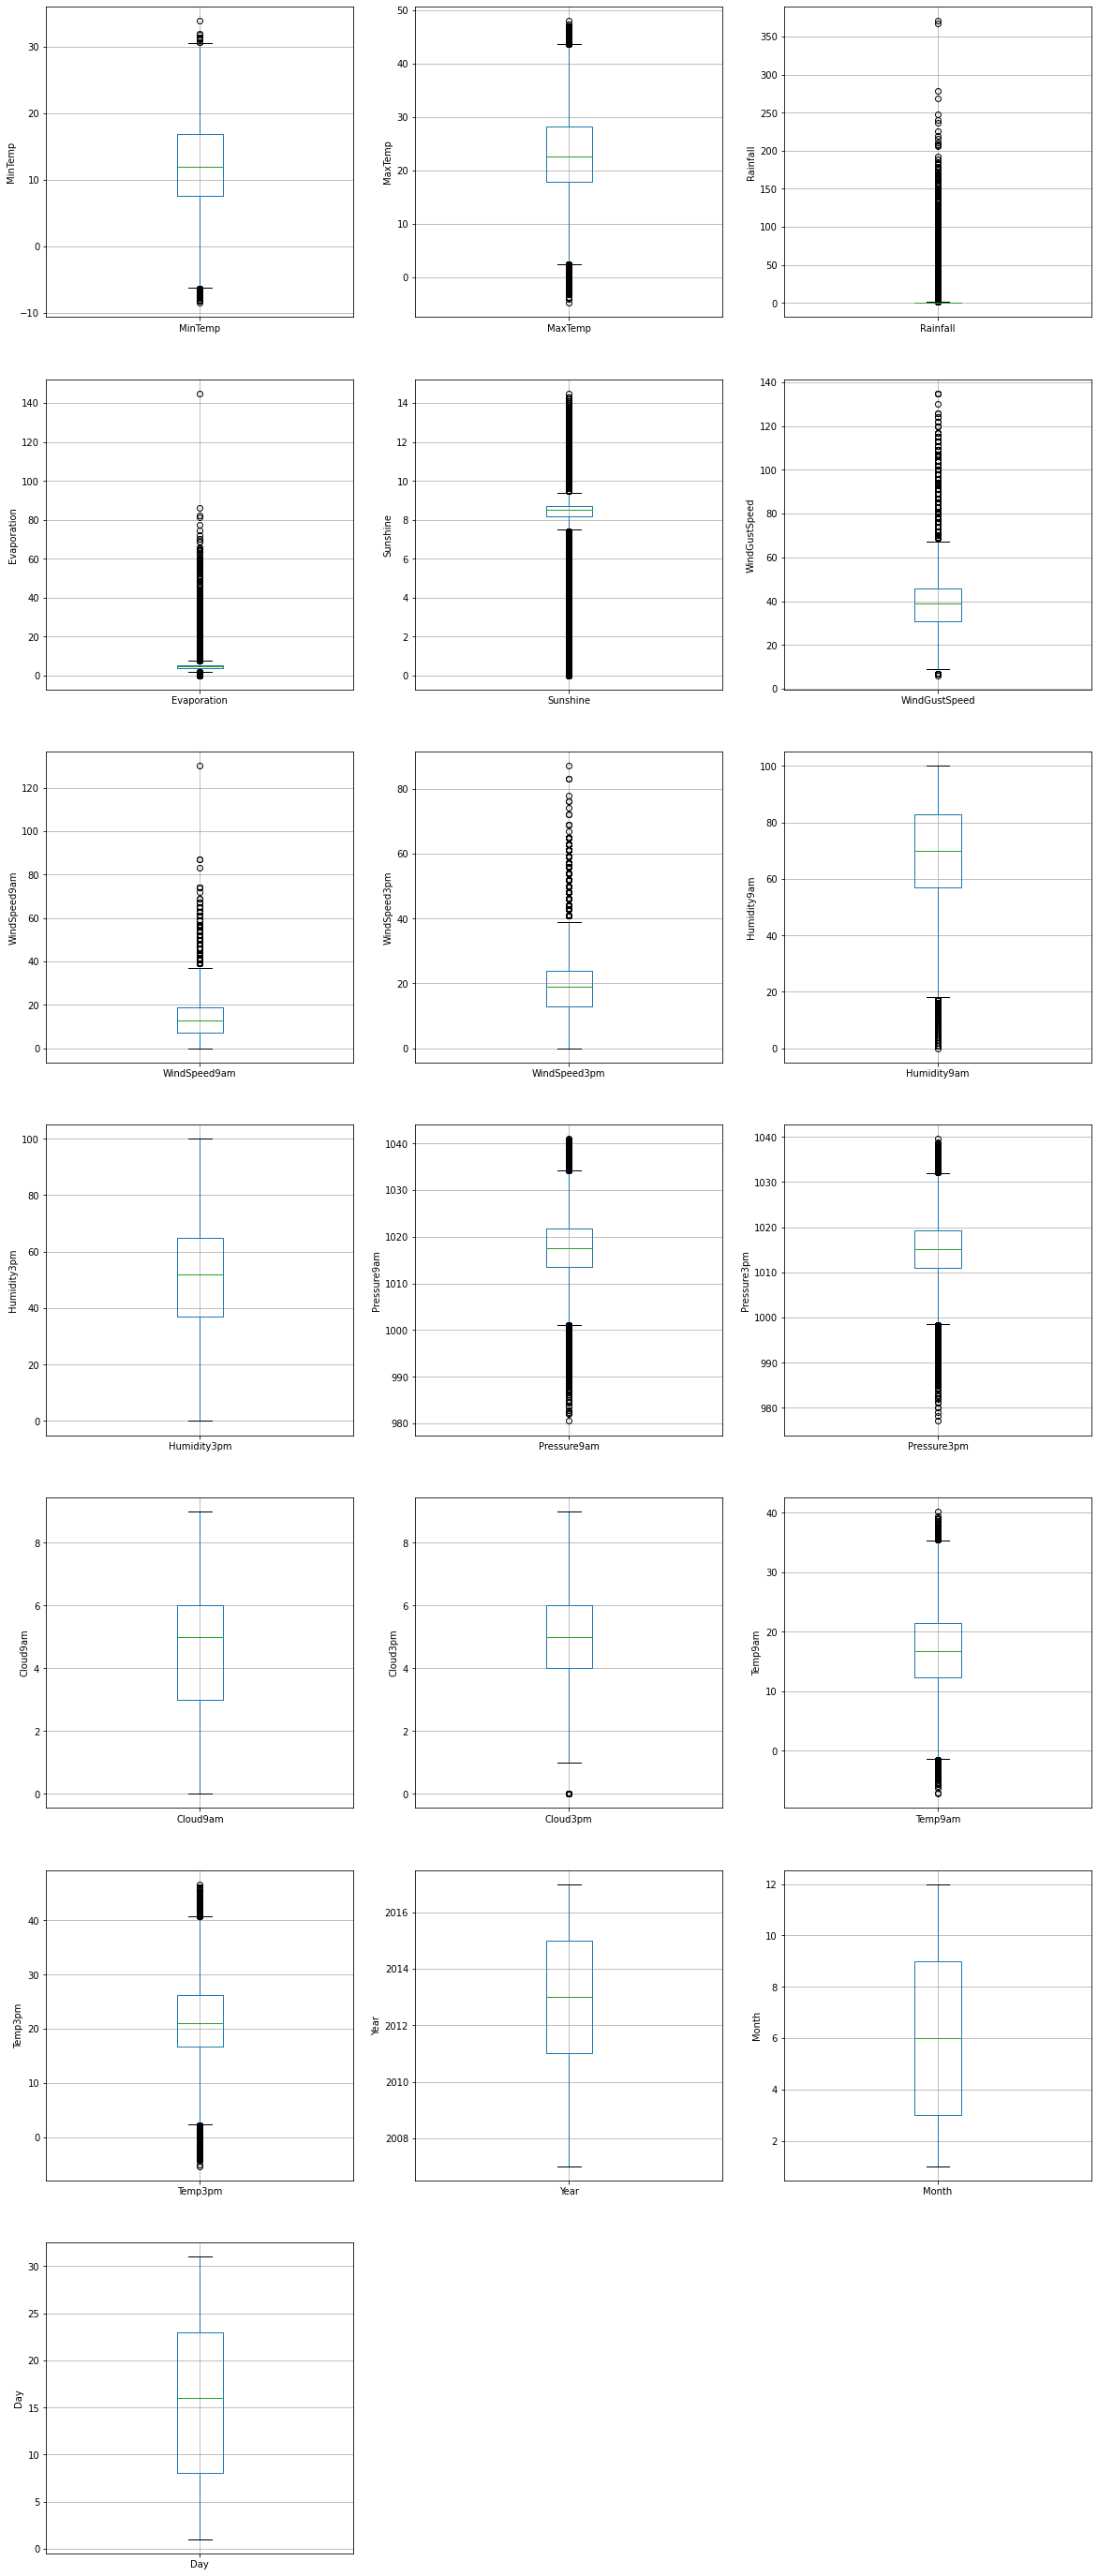

In [ ]:
# BOX PLOT FOR NUMERICAL VARIABLES
plt.figure(figsize=(20,50))

for i in numer:
   index = numer.index(i)
   plt.subplot(7,3,index+1)
   fig = df.boxplot(column=i)
   fig.set_title('')
   fig.set_ylabel(i)

MinTemp 
----------------
Q1: 7.6
Q3: 16.8
IQR: 9.200000000000001
Lower_fence: -6.200000000000001
Upper_fence: 30.6 


MaxTemp 
----------------
Q1: 17.9
Q3: 28.2
IQR: 10.3
Lower_fence: 2.4499999999999975
Upper_fence: 43.65 


Rainfall 
----------------
Q1: 0.0
Q3: 0.6
IQR: 0.6
Lower_fence: -0.8999999999999999
Upper_fence: 1.5 


Evaporation 
----------------
Q1: 4.0
Q3: 5.4
IQR: 1.4000000000000004
Lower_fence: 1.8999999999999995
Upper_fence: 7.500000000000001 


Sunshine 
----------------
Q1: 8.2
Q3: 8.7
IQR: 0.5
Lower_fence: 7.449999999999999
Upper_fence: 9.45 


WindGustSpeed 
----------------
Q1: 31.0
Q3: 46.0
IQR: 15.0
Lower_fence: 8.5
Upper_fence: 68.5 


WindSpeed9am 
----------------
Q1: 7.0
Q3: 19.0
IQR: 12.0
Lower_fence: -11.0
Upper_fence: 37.0 


WindSpeed3pm 
----------------
Q1: 13.0
Q3: 24.0
IQR: 11.0
Lower_fence: -3.5
Upper_fence: 40.5 


Humidity9am 
----------------
Q1: 57.0
Q3: 83.0
IQR: 26.0
Lower_fence: 18.0
Upper_fence: 122.0 


Humidity3pm 
----------------
Q1: 37

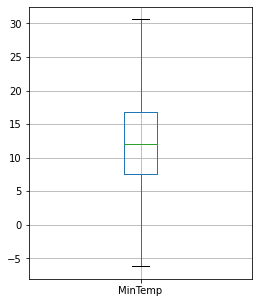

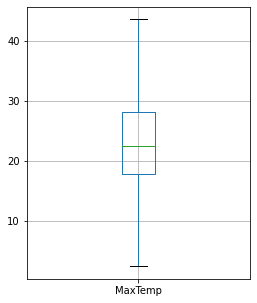

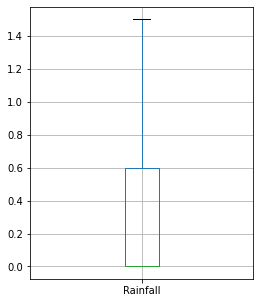

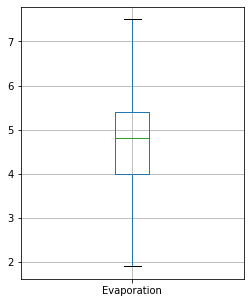

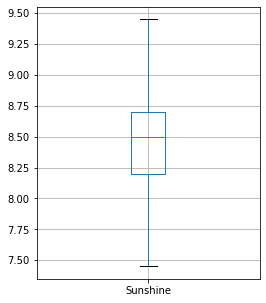

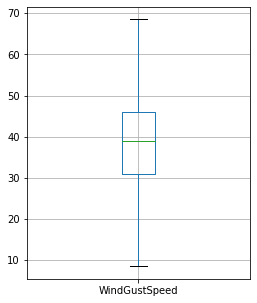

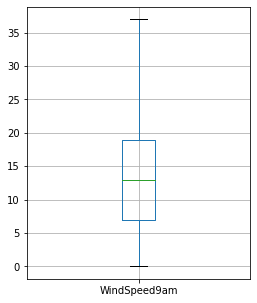

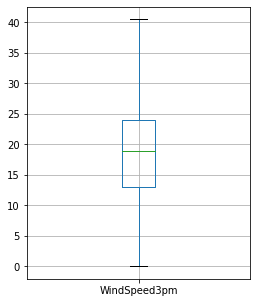

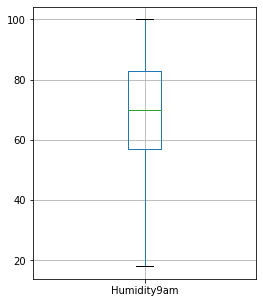

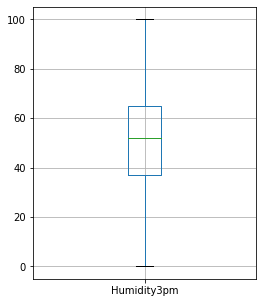

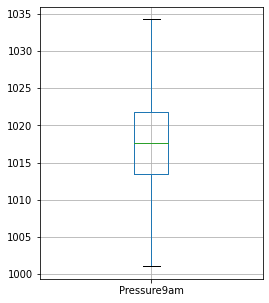

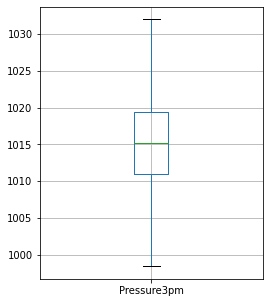

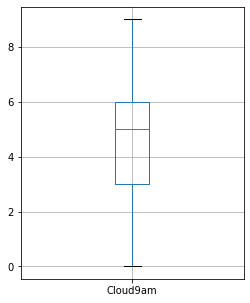

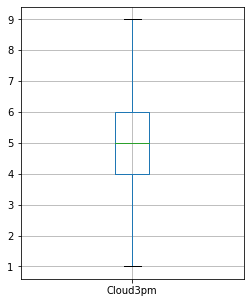

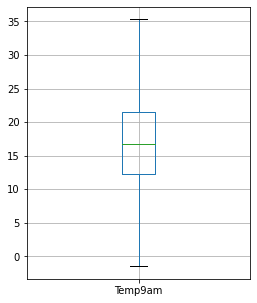

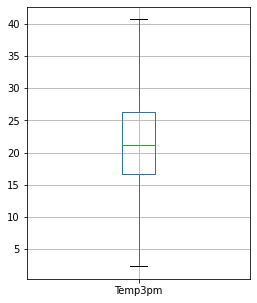

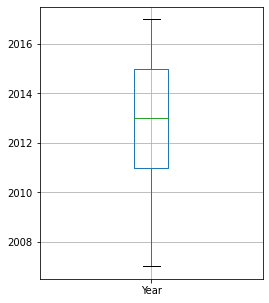

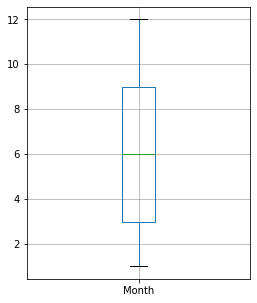

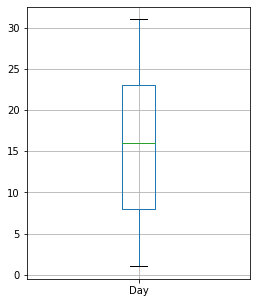

In [ ]:
#CAPPING OUTLIERS
for i in df[numer]:
  Q3=df[i].quantile(0.75)
  Q1=df[i].quantile(0.25)
  IQR = df[i].quantile(0.75) - df[i].quantile(0.25)
  Lower_fence = Q1 - (IQR * 1.5)
  Upper_fence = Q3 + (IQR * 1.5)
  print(i, '\n----------------')
  print('Q1:', Q1)
  print('Q3:', Q3)
  print('IQR:', IQR)
  print('Lower_fence:', Lower_fence)
  print('Upper_fence:', Upper_fence, '\n\n')

  df[i] = np.where(df[i] > Upper_fence, Upper_fence, np.where(df[i] < Lower_fence, Lower_fence, df[i]))
  plt.figure(figsize=(4,5))
  fig= df.boxplot(column = i)



In [ ]:
df[numer].describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,Year,Month,Day
count,142193.000000,142193.000000,142193.000000,142193.000000,142193.000000,142193.000000,142193.000000,142193.000000,142193.000000,142193.000000,142193.000000,142193.000000,142193.000000,142193.000000,142193.000000,142193.000000,142193.000000,142193.000000,142193.000000
mean,12.185750,23.228521,0.385441,4.795263,8.472442,39.602786,13.903378,18.557721,68.911015,51.495742,1017.675589,1015.269993,4.649568,4.737519,16.986648,21.678409,2012.758926,6.402544,15.715084
std,6.387989,7.092048,0.610309,1.629855,0.678737,12.201481,8.551453,8.447273,18.779092,20.532227,6.585158,6.554520,2.294357,2.048141,6.464217,6.838357,2.541256,3.426506,8.798150
min,-6.200000,2.450000,0.000000,1.900000,7.450000,8.500000,0.000000,0.000000,18.000000,0.000000,1001.050000,998.400000,0.000000,1.000000,-1.500000,2.300000,2007.000000,1.000000,1.000000
25%,7.600000,17.900000,0.000000,4.000000,8.200000,31.000000,7.000000,13.000000,57.000000,37.000000,1013.500000,1011.000000,3.000000,4.000000,12.300000,16.700000,2011.000000,3.000000,8.000000
50%,12.000000,22.600000,0.000000,4.800000,8.500000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.600000,1015.200000,5.000000,5.000000,16.700000,21.100000,2013.000000,6.000000,16.000000
75%,16.800000,28.200000,0.600000,5.400000,8.700000,46.000000,19.000000,24.000000,83.000000,65.000000,1021.800000,1019.400000,6.000000,6.000000,21.500000,26.300000,2015.000000,9.000000,23.000000
max,30.600000,43.650000,1.500000,7.500000,9.450000,68.500000,37.000000,40.500000,100.000000,100.000000,1034.250000,1032.000000,9.000000,9.000000,35.300000,40.700000,2017.000000,12.000000,31.000000


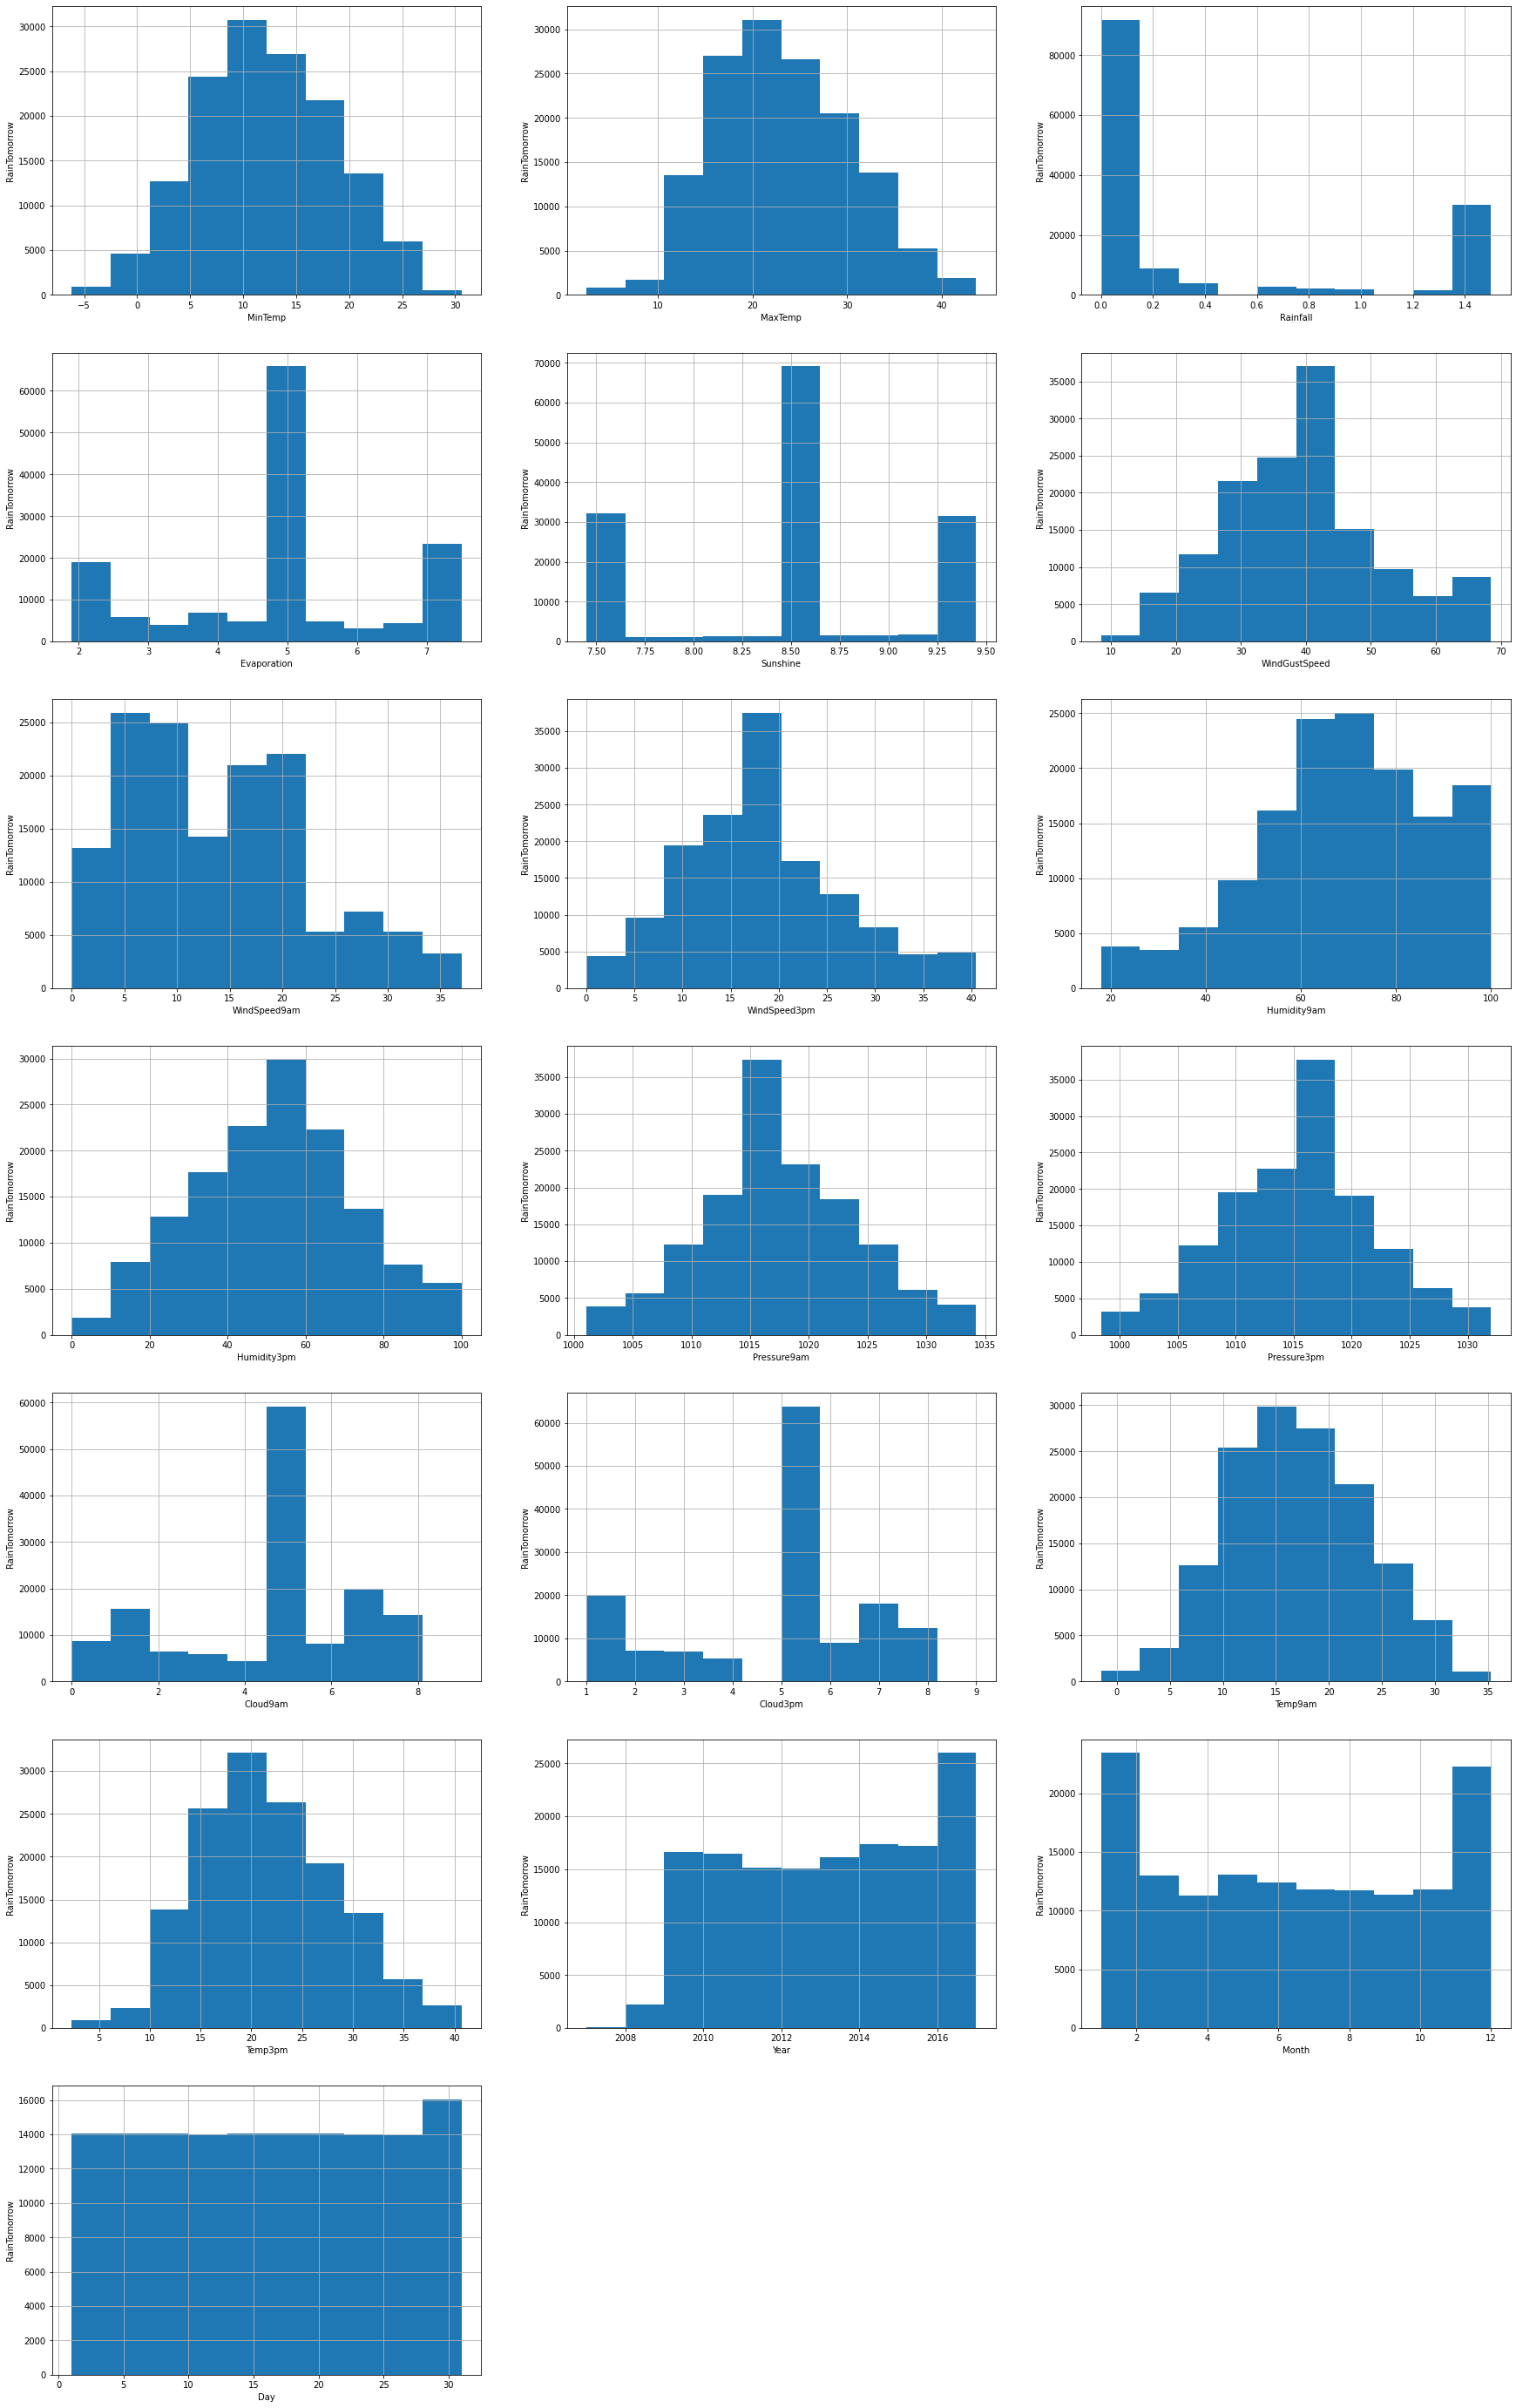

In [ ]:
# PLOT HISTOGRAM TO CHECK DISTRIBUTION
plt.figure(figsize= (30,50))

for i in numer:
   index=numer.index(i)
   plt.subplot(7, 3, index+1)
   fig = df[i].hist(bins=10)
   fig.set_xlabel(i)
   fig.set_ylabel('RainTomorrow')

In [ ]:
# ENCODING 
!pip install category_encoders

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import category_encoders as ce
encoder=ce.BinaryEncoder(cols=['RainToday'])
categor1=encoder.fit_transform(categor1)
categor1.head()

,Location,WindGustDir,WindDir9am,WindDir3pm,RainToday_0,RainToday_1,RainTomorrow
0,Albury,W,W,WNW,0,1,No
1,Albury,WNW,NNW,WSW,0,1,No
2,Albury,WSW,W,WSW,0,1,No
3,Albury,NE,SE,E,0,1,No
4,Albury,W,ENE,NW,0,1,No


In [ ]:
df1 =  pd.concat([numer1,pd.get_dummies(categor1.Location), pd.get_dummies(categor1.WindGustDir),pd.get_dummies(categor1.WindDir9am),pd.get_dummies(categor1.WindDir3pm),categor1], axis = 1)
df1.head()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,...,W,WNW,WSW,Location,WindGustDir,WindDir9am,WindDir3pm,RainToday_0,RainToday_1,RainTomorrow
0,13.4,22.9,0.6,4.8,8.5,44.0,20.0,24.0,71.0,22.0,...,0,1,0,Albury,W,W,WNW,0,1,No
1,7.4,25.1,0.0,4.8,8.5,44.0,4.0,22.0,44.0,25.0,...,0,0,1,Albury,WNW,NNW,WSW,0,1,No
2,12.9,25.7,0.0,4.8,8.5,46.0,19.0,26.0,38.0,30.0,...,0,0,1,Albury,WSW,W,WSW,0,1,No
3,9.2,28.0,0.0,4.8,8.5,24.0,11.0,9.0,45.0,16.0,...,0,0,0,Albury,NE,SE,E,0,1,No
4,17.5,32.3,1.0,4.8,8.5,41.0,7.0,20.0,82.0,33.0,...,0,0,0,Albury,W,ENE,NW,0,1,No


In [ ]:
df1.drop(['Location',	'WindGustDir',	'WindDir9am',	'WindDir3pm'], axis =1, inplace = True)

In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 142193 entries, 0 to 142192
Columns: 119 entries, MinTemp to RainTomorrow
dtypes: float64(16), int64(5), object(1), uint8(97)
memory usage: 37.0+ MB


In [ ]:
df1.head()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,...,SE,SSE,SSW,SW,W,WNW,WSW,RainToday_0,RainToday_1,RainTomorrow
0,13.4,22.9,0.6,4.8,8.5,44.0,20.0,24.0,71.0,22.0,...,0,0,0,0,0,1,0,0,1,No
1,7.4,25.1,0.0,4.8,8.5,44.0,4.0,22.0,44.0,25.0,...,0,0,0,0,0,0,1,0,1,No
2,12.9,25.7,0.0,4.8,8.5,46.0,19.0,26.0,38.0,30.0,...,0,0,0,0,0,0,1,0,1,No
3,9.2,28.0,0.0,4.8,8.5,24.0,11.0,9.0,45.0,16.0,...,0,0,0,0,0,0,0,0,1,No
4,17.5,32.3,1.0,4.8,8.5,41.0,7.0,20.0,82.0,33.0,...,0,0,0,0,0,0,0,0,1,No


In [ ]:
df1.isnull().sum()

MinTemp         0
MaxTemp         0
Rainfall        0
Evaporation     0
Sunshine        0
               ..
WNW             0
WSW             0
RainToday_0     0
RainToday_1     0
RainTomorrow    0
Length: 119, dtype: int64

In [ ]:
df1.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,...,S,SE,SSE,SSW,SW,W,WNW,WSW,RainToday_0,RainToday_1
count,142193.000000,142193.000000,142193.000000,142193.000000,142193.000000,142193.000000,142193.000000,142193.000000,142193.000000,142193.000000,...,142193.000000,142193.000000,142193.000000,142193.000000,142193.000000,142193.000000,142193.000000,142193.000000,142193.000000,142193.000000
mean,12.185565,23.225365,2.326738,5.183213,8.042236,39.920123,13.992489,18.644279,68.858235,51.495742,...,0.067500,0.101559,0.064293,0.056332,0.064574,0.069701,0.060875,0.065608,0.221213,0.778787
std,6.388936,7.109617,8.426426,3.185401,2.769638,13.140632,8.851614,8.721688,18.932512,20.532227,...,0.250886,0.302069,0.245275,0.230562,0.245774,0.254643,0.239102,0.247597,0.415065,0.415065
min,-8.500000,-4.800000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,7.600000,17.900000,0.000000,4.000000,8.200000,31.000000,7.000000,13.000000,57.000000,37.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,12.000000,22.600000,0.000000,4.800000,8.500000,39.000000,13.000000,19.000000,70.000000,52.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,16.800000,28.200000,0.600000,5.400000,8.700000,46.000000,19.000000,24.000000,83.000000,65.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,33.900000,48.100000,371.000000,145.000000,14.500000,135.000000,130.000000,87.000000,100.000000,100.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


**DECLARE FEATURE VECTOR AND TARGET VARIABLE**

In [ ]:
X = df1.drop(['RainTomorrow'], axis=1)

y = df1[['RainTomorrow']]


In [ ]:
X.head()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,...,S,SE,SSE,SSW,SW,W,WNW,WSW,RainToday_0,RainToday_1
0,13.4,22.9,0.6,4.8,8.5,44.0,20.0,24.0,71.0,22.0,...,0,0,0,0,0,0,1,0,0,1
1,7.4,25.1,0.0,4.8,8.5,44.0,4.0,22.0,44.0,25.0,...,0,0,0,0,0,0,0,1,0,1
2,12.9,25.7,0.0,4.8,8.5,46.0,19.0,26.0,38.0,30.0,...,0,0,0,0,0,0,0,1,0,1
3,9.2,28.0,0.0,4.8,8.5,24.0,11.0,9.0,45.0,16.0,...,0,0,0,0,0,0,0,0,0,1
4,17.5,32.3,1.0,4.8,8.5,41.0,7.0,20.0,82.0,33.0,...,0,0,0,0,0,0,0,0,0,1


In [ ]:
y.head()

,RainTomorrow
0,No
1,No
2,No
3,No
4,No


**FEATURE SCALING**

In [ ]:
cols=X.columns

In [ ]:
from sklearn.preprocessing import MinMaxScaler
ms = MinMaxScaler()
X= ms.fit_transform(X)
X = pd.DataFrame(X, columns=[cols])


In [ ]:
X.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,...,S,SE,SSE,SSW,SW,W,WNW,WSW,RainToday_0,RainToday_1
count,142193.000000,142193.000000,142193.000000,142193.000000,142193.000000,142193.000000,142193.000000,142193.000000,142193.000000,142193.000000,...,142193.000000,142193.000000,142193.000000,142193.000000,142193.000000,142193.000000,142193.000000,142193.000000,142193.000000,142193.000000
mean,0.487867,0.529780,0.006272,0.035746,0.554637,0.262947,0.107635,0.214302,0.688582,0.514957,...,0.067500,0.101559,0.064293,0.056332,0.064574,0.069701,0.060875,0.065608,0.221213,0.778787
std,0.150682,0.134397,0.022713,0.021968,0.191009,0.101865,0.068089,0.100249,0.189325,0.205322,...,0.250886,0.302069,0.245275,0.230562,0.245774,0.254643,0.239102,0.247597,0.415065,0.415065
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.379717,0.429112,0.000000,0.027586,0.565517,0.193798,0.053846,0.149425,0.570000,0.370000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,0.483491,0.517958,0.000000,0.033103,0.586207,0.255814,0.100000,0.218391,0.700000,0.520000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,0.596698,0.623819,0.001617,0.037241,0.600000,0.310078,0.146154,0.275862,0.830000,0.650000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


**SPLITTING DATA INTO TRAIN AND TEST SET**


In [ ]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(X,y,test_size= 0.2, random_state=0) 

In [ ]:
xtrain.shape, ytrain.shape

((113754, 118), (113754, 1))

In [ ]:
xtest.shape, ytest.shape

((28439, 118), (28439, 1))

**MODEL TRAINING**

In [ ]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(solver= 'liblinear', random_state= 0)
logreg.fit(xtrain,ytrain)

LogisticRegression(random_state=0, solver='liblinear')

**PREDICT RESULTS**

In [ ]:
ypred = logreg.predict(xtest)
ypred

array(['No', 'No', 'No', ..., 'No', 'No', 'Yes'], dtype=object)

In [ ]:
logreg.predict_proba(xtest)[:,0]

array([0.91221028, 0.85238308, 0.82926022, ..., 0.97688118, 0.79082835,
       0.33714607])

In [ ]:
logreg.predict_proba(xtest)[:,1]

array([0.08778972, 0.14761692, 0.17073978, ..., 0.02311882, 0.20917165,
       0.66285393])

**CHECK ACCURACY SCORE**

In [ ]:
from sklearn.metrics import accuracy_score

print('Model accuracy score: {0:0.4f}'. format(accuracy_score(ytest, ypred)))

Model accuracy score: 0.8502


In [ ]:
#Compare the train-set and test-set accuracy

y_pred_train = logreg.predict(xtrain)

y_pred_train

array(['No', 'No', 'No', ..., 'No', 'No', 'No'], dtype=object)

In [ ]:
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(ytrain, y_pred_train)))


Training-set accuracy score: 0.8477


In [ ]:
#Check for overfitting and underfitting

print('Training set score: {:.4f}'.format(logreg.score(xtrain, ytrain)))

print('Test set score: {:.4f}'.format(logreg.score(xtest, ytest)))


Training set score: 0.8477
Test set score: 0.8502


LOGISTIC REGRESSION MODEL WITH C =100


In [ ]:
logreg100=LogisticRegression(C=100,solver='liblinear',random_state=0)
logreg100.fit(xtrain,ytrain)
print('Training set score: {:.4f}'.format(logreg100.score(xtrain,ytrain)))
print('Test set score: {:.4f}'.format(logreg100.score(xtest,ytest)))

Training set score: 0.8482
Test set score: 0.8501


**COMPARE MODEL ACCURACY WITH NULL ACCURACY**

In [ ]:
ytest.value_counts()

RainTomorrow
No              22067
Yes              6372
dtype: int64

In [ ]:
# CHECK NULL ACCURACY SCORE

null_accuracy = (22067/(22067+6372))

print('Null accuracy score: {0:0.4f}'. format(null_accuracy))

Null accuracy score: 0.7759


**CONFUSION MATRIX**

In [ ]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(ytest, ypred)

print('Confusion matrix\n\n', cm)

print('\nTrue Positives(TP) = ', cm[0,0])

print('\nTrue Negatives(TN) = ', cm[1,1])

print('\nFalse Positives(FP) = ', cm[0,1])

print('\nFalse Negatives(FN) = ', cm[1,0])


Confusion matrix

 [[20904  1163]
 [ 3096  3276]]

True Positives(TP) =  20904

True Negatives(TN) =  3276

False Positives(FP) =  1163

False Negatives(FN) =  3096


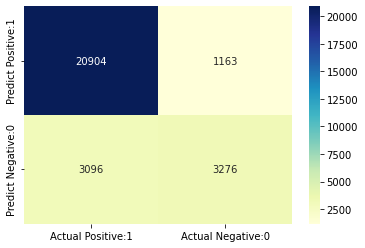

In [ ]:
cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])


sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')


**CLASSIFICATION METRICS**


In [ ]:
from sklearn.metrics import classification_report

print(classification_report(ytest, ypred))

              precision    recall  f1-score   support

          No       0.87      0.95      0.91     22067
         Yes       0.74      0.51      0.61      6372

    accuracy                           0.85     28439
   macro avg       0.80      0.73      0.76     28439
weighted avg       0.84      0.85      0.84     28439

